# Bagging - Bootstrap Aggregation

- No funciona en modelos lineales como la regresión logistica o lineal por ejemplo
- Usado en arboles (Random Forests por ejemplo)
- Modelos con alta varianza que se combinan para disminuirla

In [1]:
%load_ext autoreload
%autoreload 2
import reg_helper as RHelper
import numpy as np
from functools import partial
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

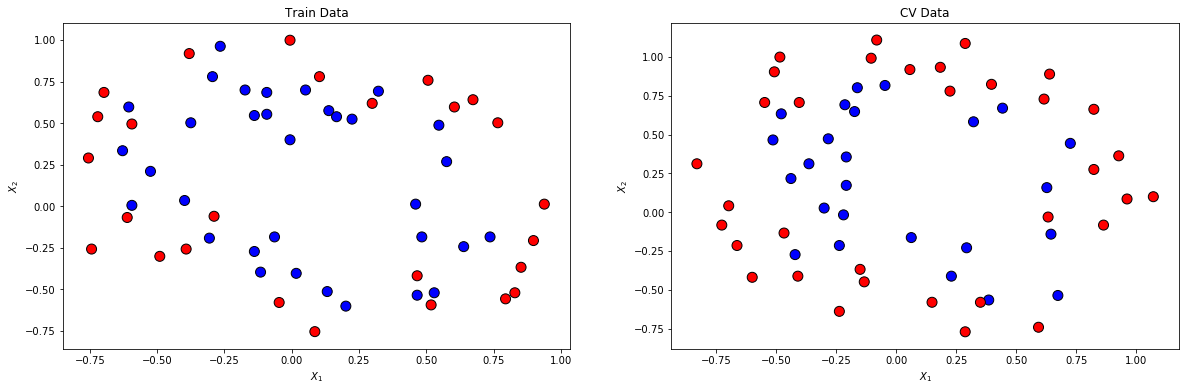

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [36]:
# Cantidad de modelos 100
bagg_clf = BaggingClassifier(DecisionTreeClassifier(random_state=1, criterion='entropy'), n_estimators=1000, 
                             max_samples=0.8, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, random_state=1)

bagg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
    

In [37]:
score_train = bagg_clf.score(X_train, y_train)
score_test = bagg_clf.score(X_test, y_test)

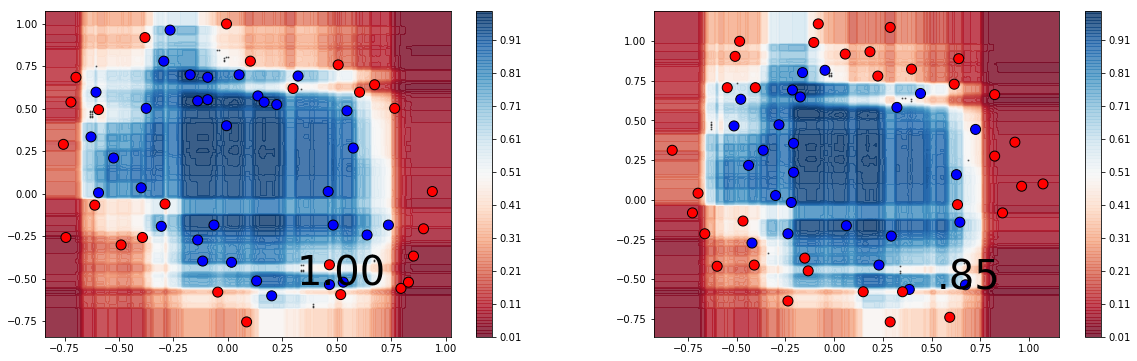

In [38]:
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
pred_type = 'proba'
RHelper.plot_boundaries(X_train, y_train, score_train, bagg_clf.predict_proba, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.predict_proba, mesh_res=200, ax=ax2)

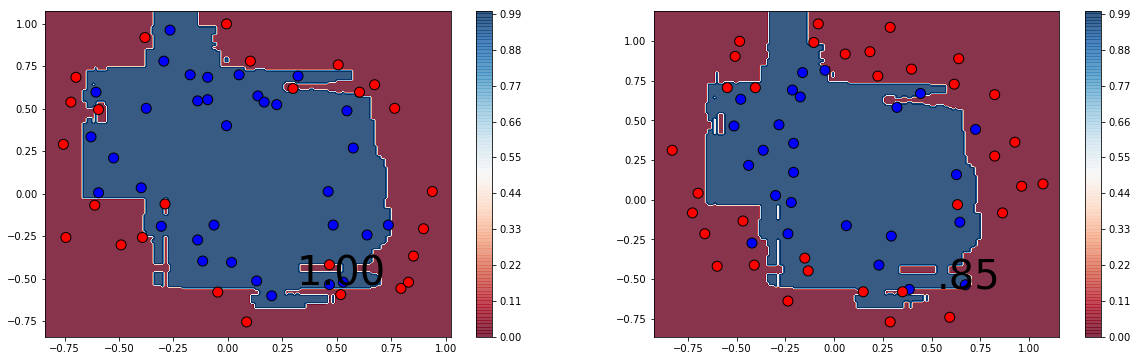

In [39]:
# Graficamos clases en el plano
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, bagg_clf.predict, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.predict, mesh_res=200, ax=ax2)

In [40]:
bagg_clf.estimators_[:5]

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1028862084, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=870353631, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
               

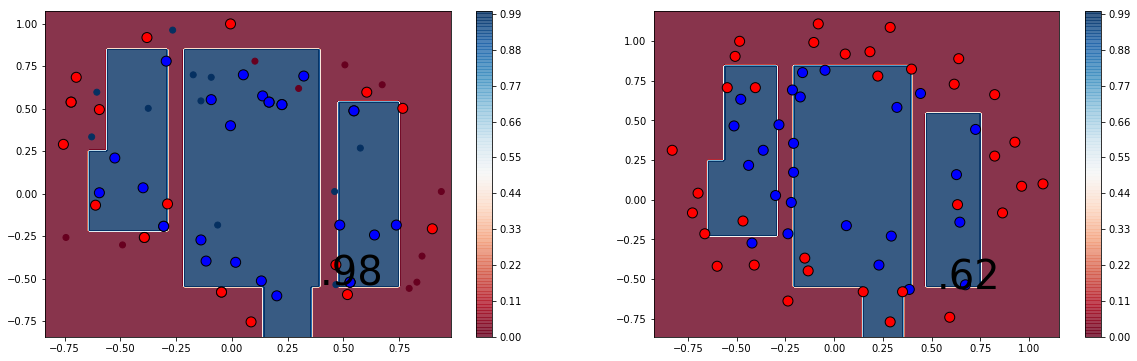

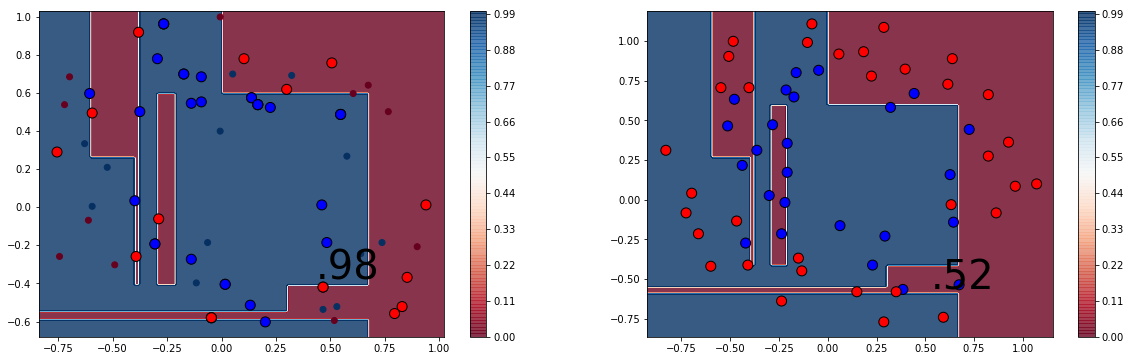

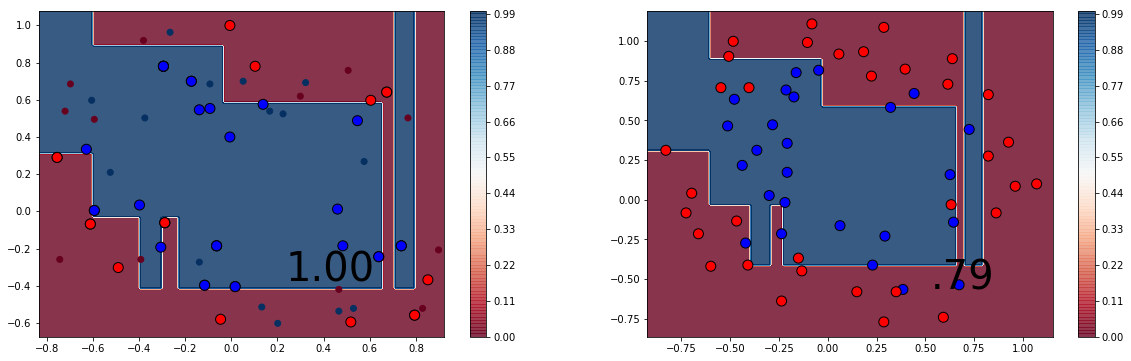

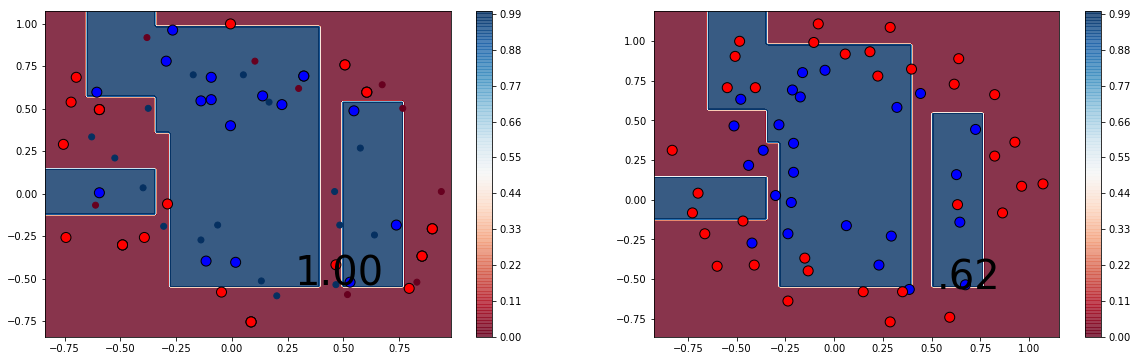

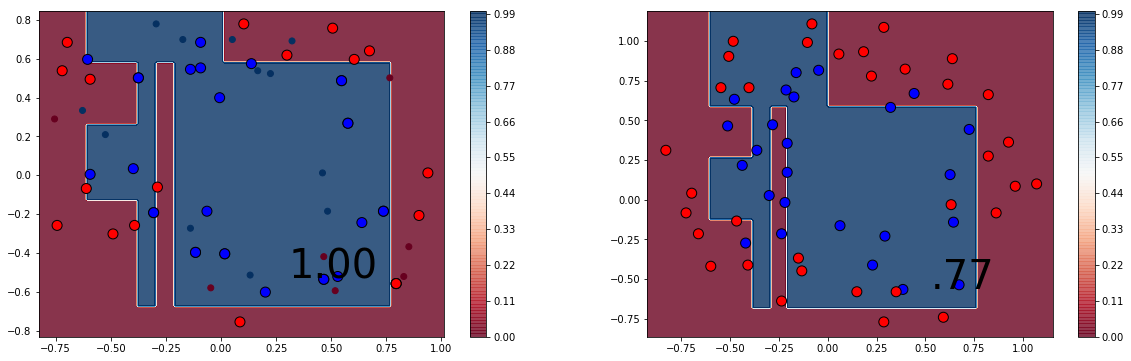

In [41]:
for clf_i in range(5):
    idxs = bagg_clf.estimators_samples_[clf_i]
    idxs_not_used = list(set(range(len(y_train)))-set(idxs))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    score_train = bagg_clf.estimators_[clf_i].score(X_train[idxs], y_train[idxs])
    score_test = bagg_clf.estimators_[clf_i].score(X_test[idxs_not_used], y_test[idxs_not_used])
    RHelper.plot_boundaries(X_train[idxs], y_train[idxs], score_train, bagg_clf.estimators_[clf_i].predict_proba, mesh_res=200, ax=ax1)
    RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.estimators_[clf_i].predict_proba, mesh_res=200, ax=ax2)
    ax1.scatter(X_train[idxs_not_used][:,0], X_train[idxs_not_used][:,1], c=1*y_train[idxs_not_used], cmap=plt.cm.RdBu)

In [30]:
clf_i = 4
bagg_clf.estimators_[clf_i].feature_importances_

array([0.57863434, 0.42136566])

In [31]:
bagg_clf.estimators_[clf_i].tree_.max_depth, bagg_clf.estimators_[clf_i].tree_.n_leaves, bagg_clf.estimators_[clf_i].tree_.node_count

(8, 13, 25)

In [32]:
indexes = bagg_clf.estimators_samples_[clf_i]
indexes

array([ 6, 34,  2, 27, 58,  8, 26, 28, 43, 20, 36,  0, 30, 40, 14,  3,  4,
        6, 48, 56,  9,  9,  8, 36, 13,  5, 25,  3, 38, 29, 10, 57, 30, 17,
       39, 20, 32, 45, 14, 15, 21, 51, 28, 33,  9, 44, 42,  8, 34, 38, 23,
       48, 36,  1, 25, 48, 15, 52,  3])

In [33]:
len(indexes), len(set(indexes)), (y_train[indexes]==0).sum(), (y_train[indexes]==1).sum()

(59, 40, 22, 37)

In [34]:
(X_train[indexes, 0] <= 0.766).sum()

53

In [35]:
((X_train[indexes, 1]<=0.766) & (y_train[indexes]==1)).sum()

37

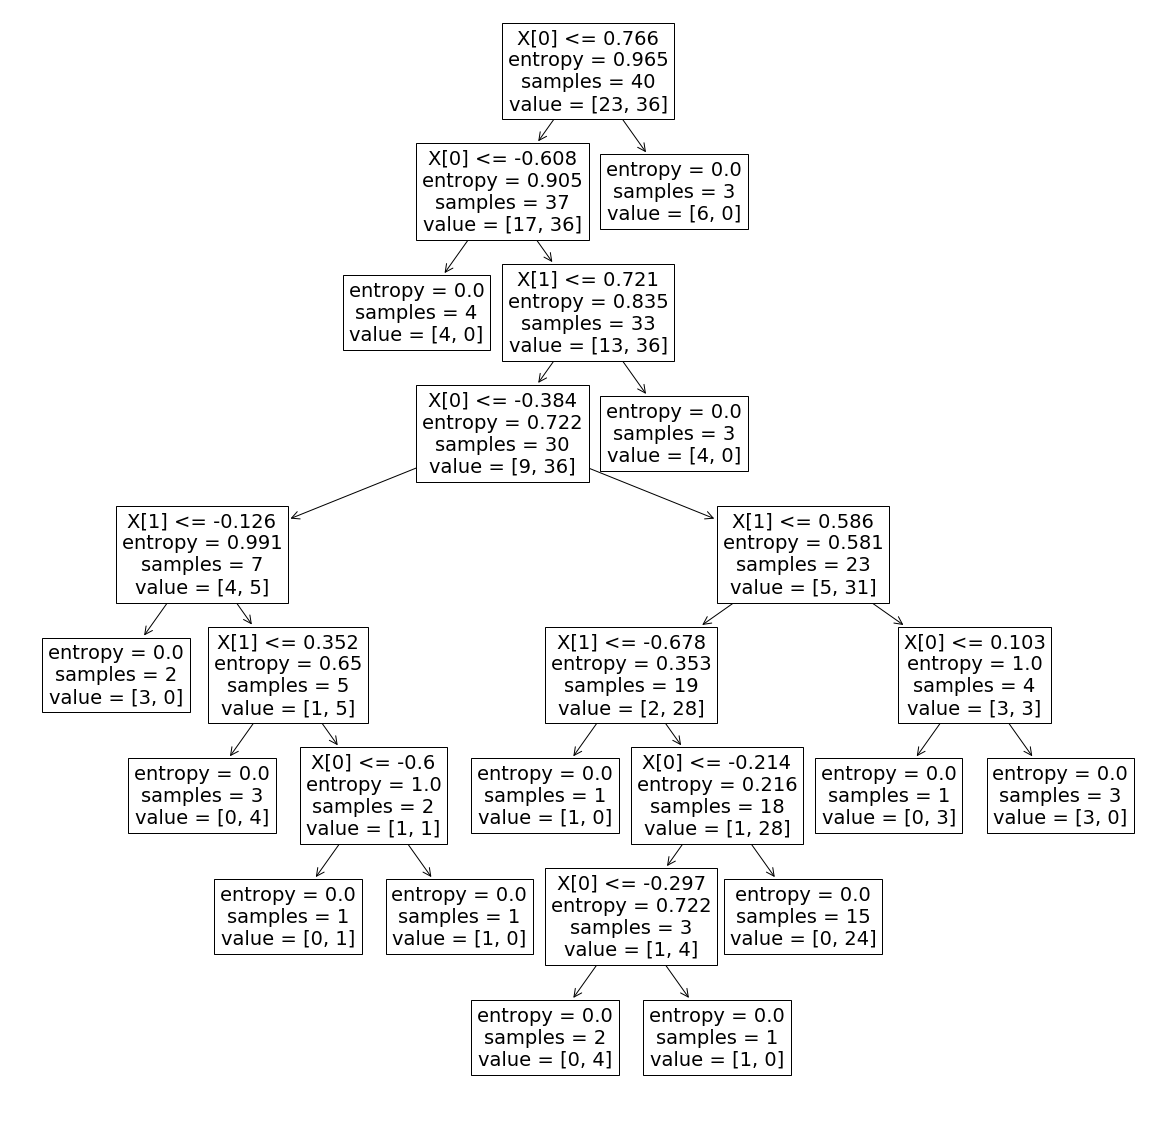

In [36]:
plt.figure(figsize=(20,20))
_= plot_tree(bagg_clf.estimators_[clf_i])

In [101]:
dt_clf = DecisionTreeClassifier(random_state=1, criterion='entropy')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [102]:
dt_clf.tree_.impurity

array([0.98982206, 0.95615502, 0.        , 0.91134238, 0.85418021,
       0.81127812, 1.        , 0.        , 0.        , 0.        ,
       0.77934984, 0.97986876, 0.72192809, 0.        , 1.        ,
       0.        , 0.        , 0.59167278, 0.        , 0.91829583,
       0.        , 0.        , 0.60518658, 0.        , 0.89049164,
       0.50325833, 0.91829583, 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.81127812, 0.        , 0.        ,
       0.91829583, 0.91829583, 0.        , 0.        , 0.        ,
       0.        ])

samples: 59, ceros: 26, unos: 33, entropía: 0.9898220559635809


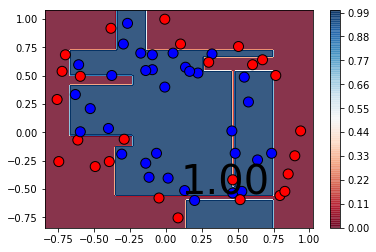

In [111]:
RHelper.plot_boundaries(X_train, y_train, score_train, dt_clf.predict_proba, 
                            mesh_res=200)
s = len(y_train)
z = (y_train == 0).sum()
o = (y_train == 1).sum()
p1 = o/s
p0 = z/s
print(f'samples: {s}, ceros: {z}, unos: {o}, entropía: {p1*np.log2(1/p1) + p0*np.log2(1/p0)}')

In [118]:
(X_train[:,0]<=0.751).sum(), (X_train[:,0]>0.751).sum()

(53, 6)

In [119]:
clf_as_ones = y_train[np.where(X_train[:,0]<=0.751)]
p_ones = clf_as_ones.sum()/len(clf_as_ones)
p_zeros = 1-p_ones

In [120]:
p_ones*np.log2(1/p_ones) + p_zeros*np.log2(1/p_zeros)

0.9561550236844027

In [109]:
dt_clf.tree_.impurity

array([0.98982206, 0.95615502, 0.        , 0.91134238, 0.85418021,
       0.81127812, 1.        , 0.        , 0.        , 0.        ,
       0.77934984, 0.97986876, 0.72192809, 0.        , 1.        ,
       0.        , 0.        , 0.59167278, 0.        , 0.91829583,
       0.        , 0.        , 0.60518658, 0.        , 0.89049164,
       0.50325833, 0.91829583, 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.81127812, 0.        , 0.        ,
       0.91829583, 0.91829583, 0.        , 0.        , 0.        ,
       0.        ])

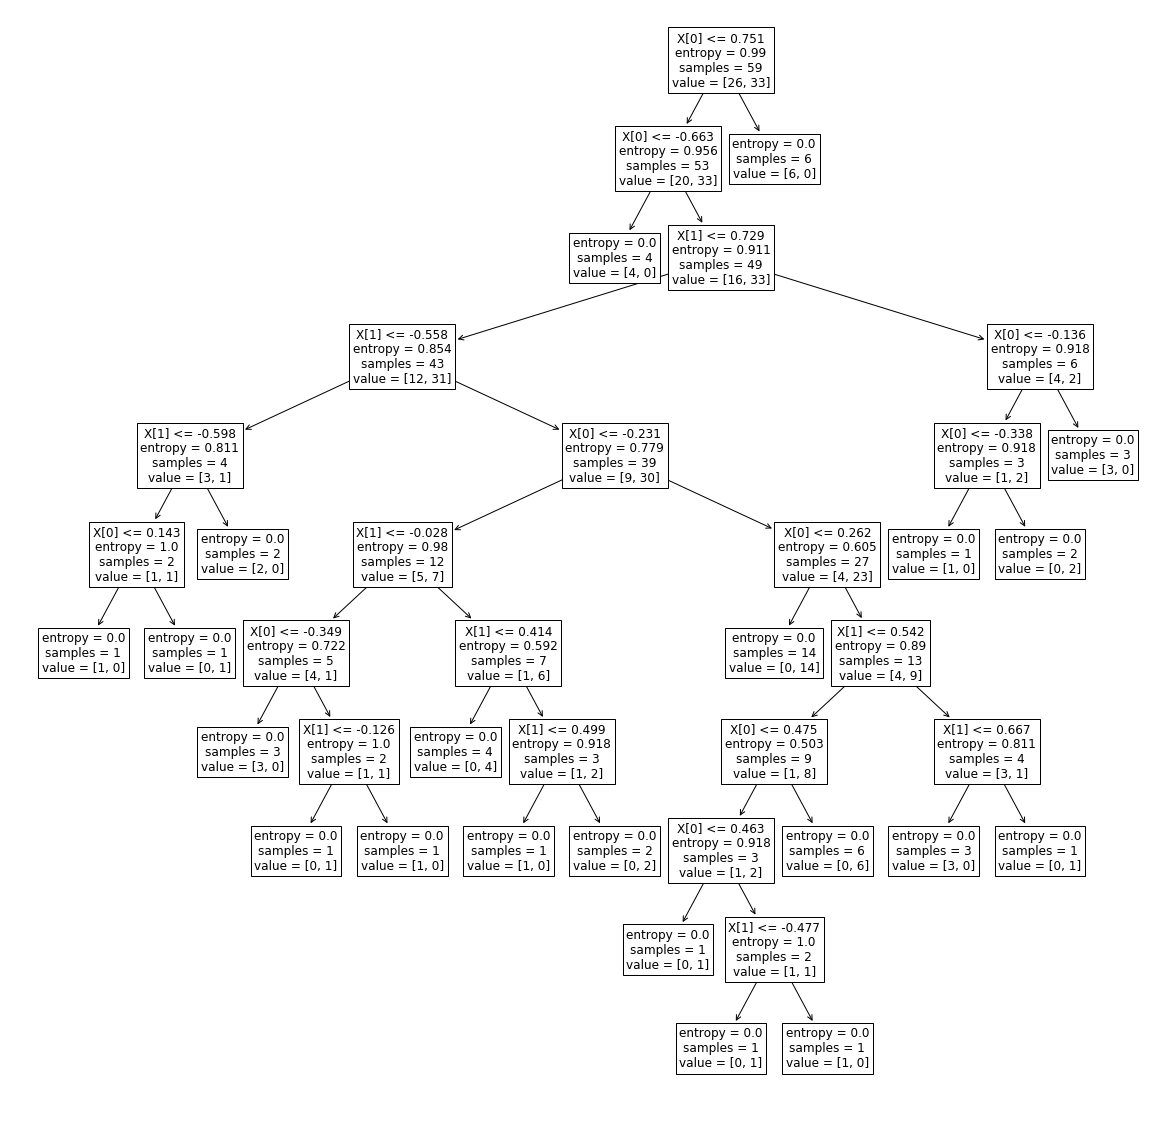

In [110]:
plt.figure(figsize=(20,20))
_= plot_tree(dt_clf)